In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# step 1: read data

In [2]:
data1=pd.read_csv('loan.csv')
data1

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [3]:
data1.describe().round(2)

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.00,163987.00,158183.00,163983.00,163987.00,163958.00,163794.00,163958.00,163987.00,163958.00
mean,13074.17,13.72,5.68,71915.67,15.88,0.23,54.08,24.58,0.18,14.85
std,7993.56,4.39,3.61,59070.92,7.59,0.69,25.29,11.69,0.39,6.95
min,500.00,5.42,0.00,1896.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,7000.00,10.65,2.00,45000.00,10.23,0.00,35.60,16.00,0.00,10.00
50%,11325.00,13.49,6.00,61000.00,15.62,0.00,55.80,23.00,0.00,14.00
75%,18000.00,16.32,10.00,85000.00,21.26,0.00,74.20,31.00,0.00,18.00
max,35000.00,26.06,10.00,7141778.00,39.99,29.00,150.70,118.00,1.00,65.00


# data preprocessing

# step 2: check for null values

In [4]:
data1.isnull().any()

loan_amnt                False
term                     False
int_rate                 False
emp_length                True
home_ownership           False
annual_inc                True
purpose                  False
addr_state               False
dti                      False
delinq_2yrs               True
revol_util                True
total_acc                 True
bad_loan                 False
longest_credit_length     True
verification_status      False
dtype: bool

# step 2.1 remove null values

In [5]:
clean_data=data1.dropna(how='any',axis=0)

In [6]:
clean_data

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [7]:
clean_data.describe().round(2)

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,157996.00,157996.00,157996.00,157996.00,157996.00,157996.00,157996.00,157996.00,157996.00,157996.00
mean,13172.85,13.72,5.69,72779.28,15.85,0.23,54.20,24.62,0.18,14.67
std,8000.58,4.39,3.61,59629.81,7.56,0.70,25.27,11.68,0.38,6.73
min,500.00,5.42,0.00,1896.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,7000.00,10.65,2.00,45000.00,10.22,0.00,35.80,16.00,0.00,10.00
50%,11600.00,13.49,6.00,62000.00,15.59,0.00,56.00,23.00,0.00,14.00
75%,18000.00,16.29,10.00,87000.00,21.21,0.00,74.40,32.00,0.00,18.00
max,35000.00,26.06,10.00,7141778.00,39.99,29.00,150.70,118.00,1.00,65.00


In [8]:
clean_data.groupby(['verification_status','home_ownership'])['loan_amnt'].aggregate('mean').unstack()

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
verification_status,,,,,,
not verified,NaN,10123.870363,9763.461538,8106.097561,9045.159429,8779.246906
verified,5000.0,16898.106846,15727.083333,12532.394366,14926.910480,13556.724826


In [9]:
clean_data.groupby(['verification_status','addr_state'])['loan_amnt'].aggregate('mean').unstack()

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
verification_status,,,,,,,,,,,,,,,,,,,,,
not verified,10978.937008,9132.471264,8482.876712,9241.061549,9534.144347,9506.343578,9171.464393,9273.364486,8867.333333,9024.478167,...,8704.032258,9036.817102,9665.721649,9729.352227,9480.469613,8742.982456,9418.406389,9414.204545,9114.733840,9759.631148
verified,17529.212454,15020.439045,14073.177843,14904.353070,15352.424344,15764.595983,15708.109017,15825.352113,14880.291971,14584.457249,...,14866.346154,15759.695704,16066.022697,15316.608392,15944.224992,13721.354167,15476.238157,15193.589175,15448.067633,15963.396624


C:\Users\hadiqa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


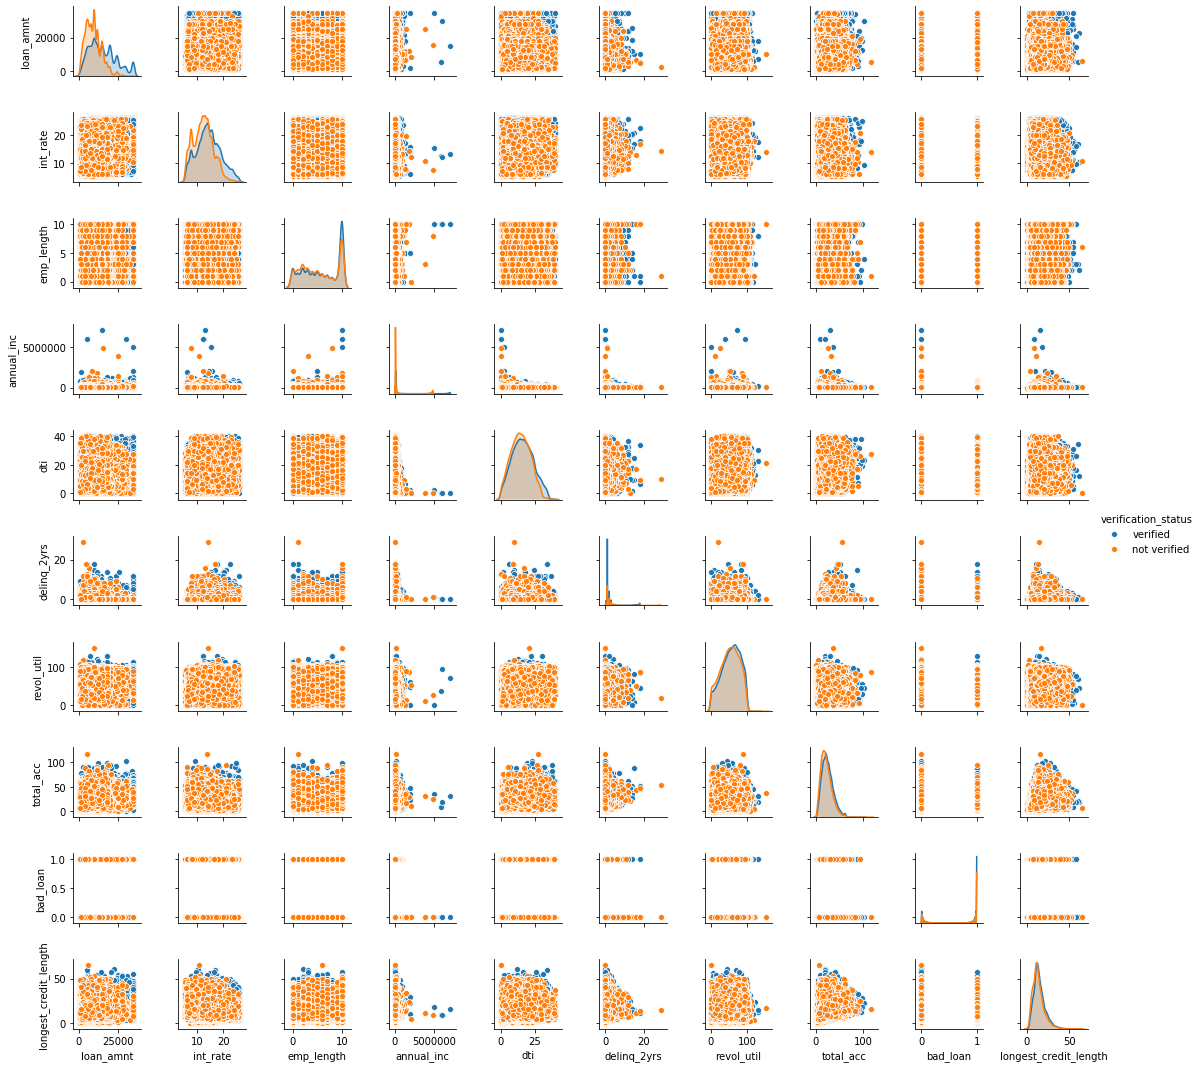

In [11]:
sns.pairplot(clean_data, hue='verification_status', size=1.5);


In [8]:
clean_data.shape

(157996, 15)

# step 3 :detecting outliers in data

In [9]:
#Create a dataframe of only numerical data
numeric_data = clean_data.select_dtypes(['float','int'])
numeric_data.head()

,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length
0,10.65,10.0,24000.0,27.65,0.0,83.7,9.0,26.0
1,15.27,0.0,30000.0,1.00,0.0,9.4,4.0,12.0
2,15.96,10.0,12252.0,8.72,0.0,98.5,10.0,10.0
3,13.49,10.0,49200.0,20.00,0.0,21.0,37.0,15.0
4,7.90,3.0,36000.0,11.20,0.0,28.3,12.0,7.0


In [10]:
fig=plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

In [11]:
ax=Axes3D(fig,elev=110,azim=-115)

# outlier in loan_amount

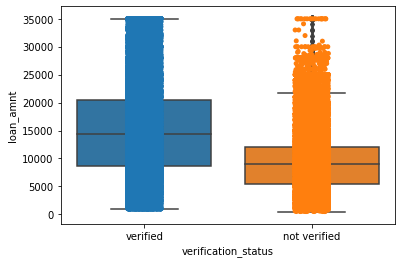

In [12]:
ax=sns.boxplot(x="verification_status",y="loan_amnt",data=clean_data)
ax=sns.stripplot(x="verification_status",y="loan_amnt",data=clean_data,jitter=True,edgecolor="gray")

# outlier in dti

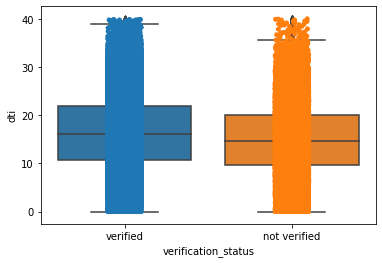

In [13]:
ax=sns.boxplot(x="verification_status",y="dti",data=clean_data)
ax=sns.stripplot(x="verification_status",y="dti",data=clean_data,jitter=True,edgecolor="gray")

# outliers in delinq_2yrs

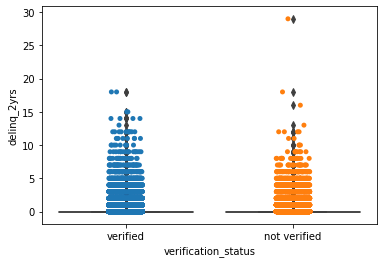

In [14]:
ax=sns.boxplot(x="verification_status",y="delinq_2yrs",data=clean_data)
ax=sns.stripplot(x="verification_status",y="delinq_2yrs",data=clean_data,jitter=True,edgecolor="gray")

# outlier longest_credit_length

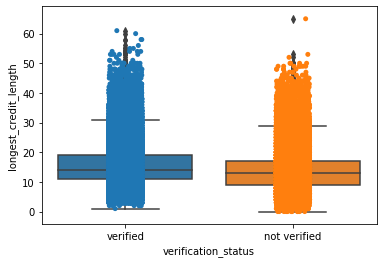

In [15]:
ax=sns.boxplot(x="verification_status",y="longest_credit_length",data=clean_data)
ax=sns.stripplot(x="verification_status",y="longest_credit_length",data=clean_data,jitter=True,edgecolor="gray")

# outliers in emp_length

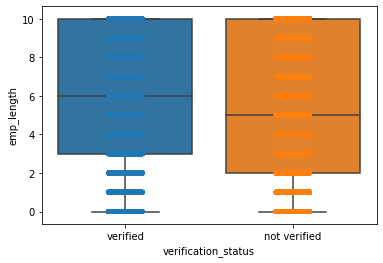

In [16]:
ax=sns.boxplot(x="verification_status",y="emp_length",data=clean_data)
ax=sns.stripplot(x="verification_status",y="emp_length",data=clean_data,jitter=True,edgecolor="gray")

# outliers in revol_util

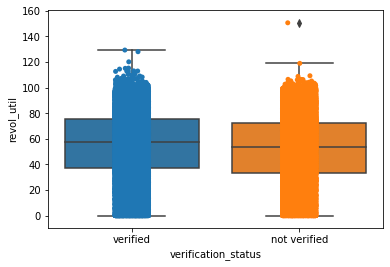

In [17]:
ax=sns.boxplot(x="verification_status",y="revol_util",data=clean_data)
ax=sns.stripplot(x="verification_status",y="revol_util",data=clean_data,jitter=True,edgecolor="gray")

# outlier in total_acc

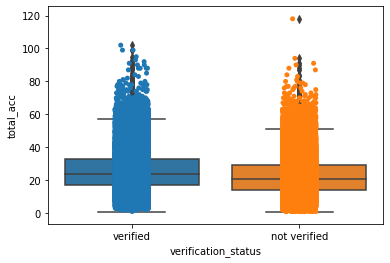

In [18]:
ax=sns.boxplot(x="verification_status",y="total_acc",data=clean_data)
ax=sns.stripplot(x="verification_status",y="total_acc",data=clean_data,jitter=True,edgecolor="gray")

# outliers in interest rate

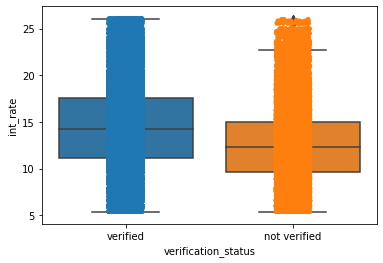

In [19]:
ax=sns.boxplot(x="verification_status",y="int_rate",data=clean_data)
ax=sns.stripplot(x="verification_status",y="int_rate",data=clean_data,jitter=True,edgecolor="gray")

# ountlier in annual income

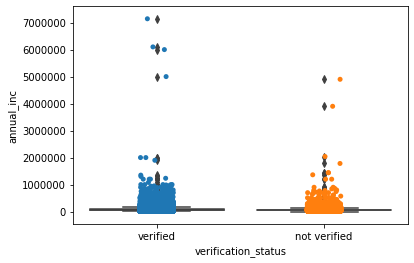

In [20]:
ax=sns.boxplot(x="verification_status",y="annual_inc",data=clean_data)
ax=sns.stripplot(x="verification_status",y="annual_inc",data=clean_data,jitter=True,edgecolor="gray")

# step 3.1 outlier removal

In [96]:
clean_data_after_outlier=clean_data

In [21]:
clean_data_after_outlier=clean_data[(clean_data.loan_amnt >=7000) &(clean_data.loan_amnt<=18000)&(clean_data.annual_inc>=45000)&(clean_data.annual_inc<=85000)]

In [99]:
clean_data_after_outlier

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


# step 3.2 data after outlier removal

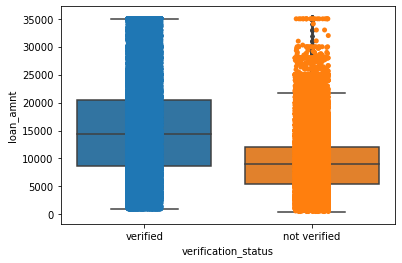

In [100]:
ax=sns.boxplot(x="verification_status",y="loan_amnt",data=clean_data_after_outlier)
ax=sns.stripplot(x="verification_status",y="loan_amnt",data=clean_data_after_outlier,jitter=True,edgecolor="gray")

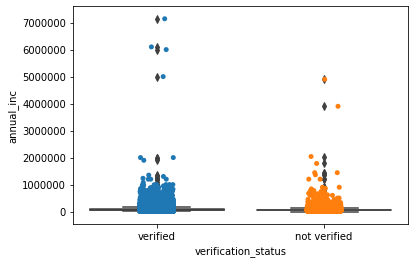

In [101]:
ax=sns.boxplot(x="verification_status",y="annual_inc",data=clean_data_after_outlier)
ax=sns.stripplot(x="verification_status",y="annual_inc",data=clean_data_after_outlier,jitter=True,edgecolor="gray")

# step 4: check multicollinearity between numerical features

In [102]:
data_colinear=clean_data_after_outlier[['loan_amnt','int_rate','emp_length','annual_inc','dti','delinq_2yrs','revol_util','total_acc','bad_loan','longest_credit_length']]
data_colinear

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
0,5000,10.65,10.0,24000.0,27.65,0.0,83.7,9.0,0,26.0
1,2500,15.27,0.0,30000.0,1.00,0.0,9.4,4.0,1,12.0
2,2400,15.96,10.0,12252.0,8.72,0.0,98.5,10.0,0,10.0
3,10000,13.49,10.0,49200.0,20.00,0.0,21.0,37.0,0,15.0
4,5000,7.90,3.0,36000.0,11.20,0.0,28.3,12.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...
163982,15000,12.39,3.0,45000.0,31.44,4.0,75.8,34.0,0,20.0
163983,20000,14.99,10.0,80000.0,23.65,0.0,68.8,18.0,0,22.0
163984,12825,17.14,6.0,38000.0,9.03,0.0,70.7,24.0,0,9.0
163985,27650,21.99,0.0,60000.0,10.10,1.0,61.2,20.0,0,6.0


Text(0, 0.5, 'annual income')

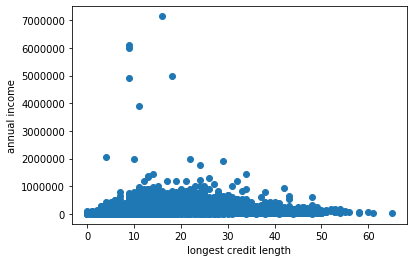

In [103]:
plt.scatter("longest_credit_length","annual_inc",data=data_colinear)
plt.xlabel("longest credit length")
plt.ylabel("annual income")

Text(0, 0.5, 'dti')

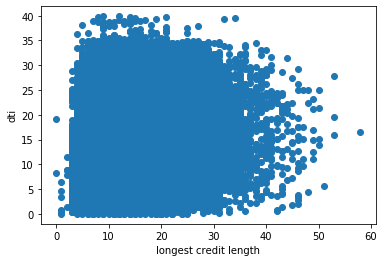

In [27]:
plt.scatter("longest_credit_length","dti",data=data_colinear)
plt.xlabel("longest credit length")
plt.ylabel("dti")

Text(0, 0.5, 'delinq_2yrs')

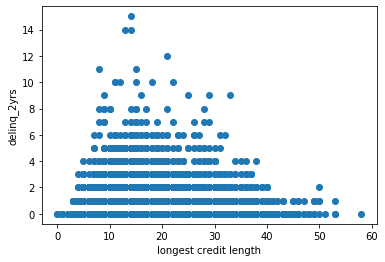

In [28]:
plt.scatter("longest_credit_length","delinq_2yrs",data=data_colinear)
plt.xlabel("longest credit length")
plt.ylabel("delinq_2yrs")

Text(0, 0.5, 'dti')

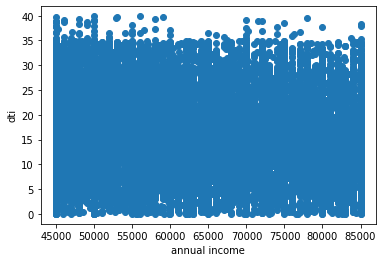

In [29]:
plt.scatter("annual_inc","dti",data=data_colinear)
plt.xlabel("annual income")
plt.ylabel("dti")

Text(0, 0.5, 'loan amount')

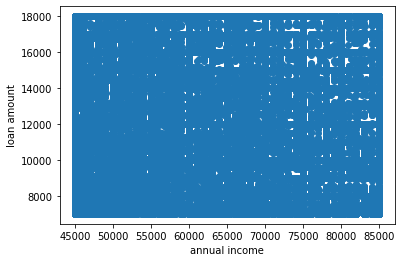

In [30]:
plt.scatter("annual_inc","loan_amnt",data=data_colinear)
plt.xlabel("annual income")
plt.ylabel("loan amount")

Text(0, 0.5, 'interest rate')

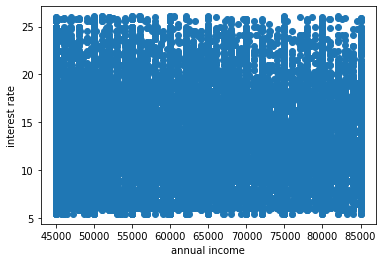

In [31]:
plt.scatter("annual_inc","int_rate",data=data_colinear)
plt.xlabel("annual income")
plt.ylabel("interest rate")

Text(0, 0.5, 'interest rate')

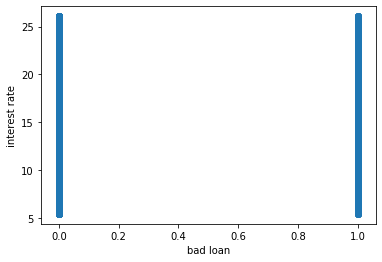

In [32]:
plt.scatter("bad_loan","int_rate",data=data_colinear)
plt.xlabel("bad loan")
plt.ylabel("interest rate")

Text(0, 0.5, 'revol util')

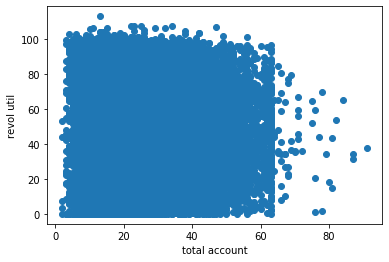

In [33]:
plt.scatter("total_acc","revol_util",data=data_colinear)
plt.xlabel("total account")
plt.ylabel("revol util")

# step 4.1:corelation analysis of numerical  features

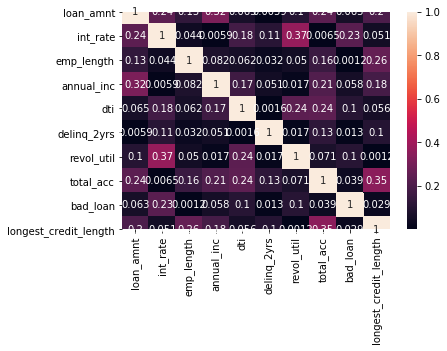

In [104]:
correlationMatrix = clean_data_after_outlier.corr().abs()

#plt.subplots(figsize=(7, 7))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

# step 5: analyzing categorical features:

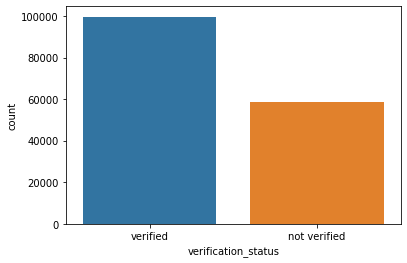

In [105]:
sns.countplot(x='verification_status',data=clean_data_after_outlier)

<Figure size 2160x2160 with 0 Axes>

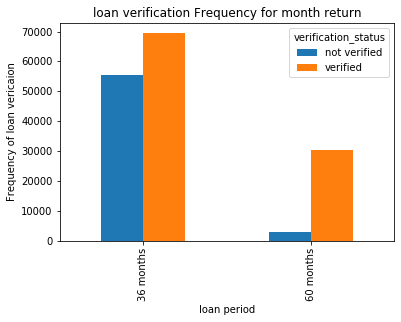

In [106]:
plt.figure(figsize=(30,30))
pd.crosstab(clean_data_after_outlier.term,clean_data_after_outlier.verification_status).plot(kind='bar')
plt.title('loan verification Frequency for month return')
plt.xlabel('loan period')
plt.ylabel('Frequency of loan vericaion')
plt.savefig('loan_fre_job')

<Figure size 2160x2160 with 0 Axes>

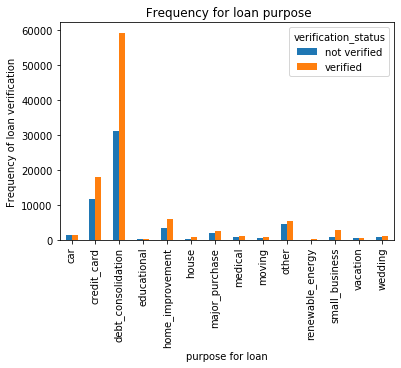

In [107]:

plt.figure(figsize=(30,30))
pd.crosstab(clean_data_after_outlier.purpose,clean_data_after_outlier.verification_status).plot(kind='bar')
plt.title(' Frequency for loan purpose')
plt.xlabel('purpose for loan')
plt.ylabel('Frequency of loan verification')
plt.savefig('loan verification_fre_job')

<Figure size 2160x2160 with 0 Axes>

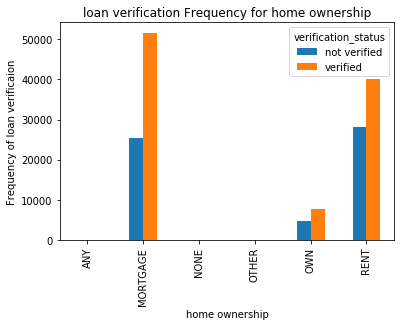

In [108]:
plt.figure(figsize=(30,30))
pd.crosstab(clean_data_after_outlier.home_ownership,clean_data_after_outlier.verification_status).plot(kind='bar')
plt.title('loan verification Frequency for home ownership')
plt.xlabel('home ownership')
plt.ylabel('Frequency of loan verificaion')
plt.savefig('home_owner_job')

<Figure size 3600x3600 with 0 Axes>

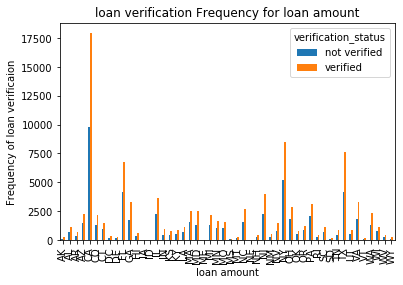

In [109]:
plt.figure(figsize=(50,50))
pd.crosstab(clean_data_after_outlier.addr_state,clean_data_after_outlier.verification_status).plot(kind='bar')
plt.title('loan verification Frequency for loan amount')
plt.xlabel('loan amount')
plt.ylabel('Frequency of loan verificaion')
plt.savefig('loan_fre_job')

# step 5.1 analyzing numerical features distributions

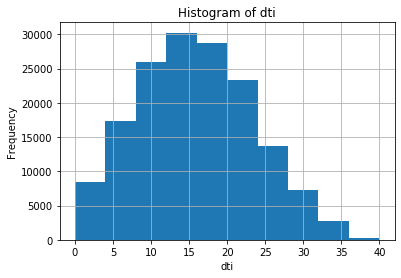

In [110]:
clean_data_after_outlier.dti.hist()
plt.title('Histogram of dti')
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount')

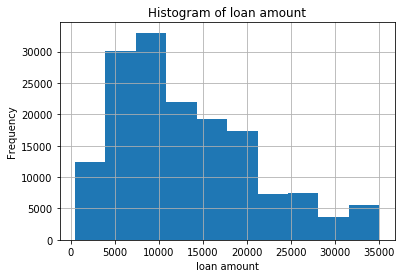

In [111]:
clean_data_after_outlier.loan_amnt.hist()
plt.title('Histogram of loan amount')
plt.xlabel('loan amount')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount')

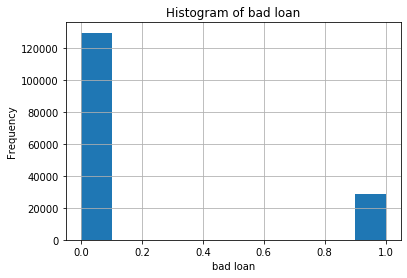

In [112]:
clean_data_after_outlier.bad_loan.hist()
plt.title('Histogram of bad loan')
plt.xlabel('bad loan')
plt.ylabel('Frequency')
plt.savefig('bad_loan_amount')

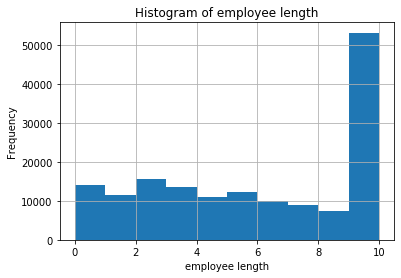

In [113]:
clean_data_after_outlier.emp_length.hist()
plt.title('Histogram of employee length')
plt.xlabel('employee length')
plt.ylabel('Frequency')
plt.savefig('emp_loan_amount')

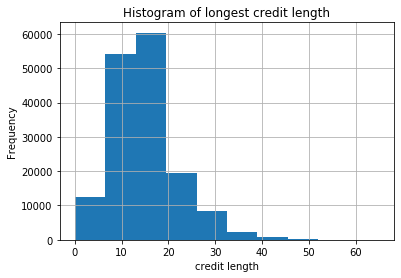

In [114]:
clean_data_after_outlier.longest_credit_length.hist()
plt.title('Histogram of longest credit length')
plt.xlabel('credit length')
plt.ylabel('Frequency')
plt.savefig('credit_loan_amount')

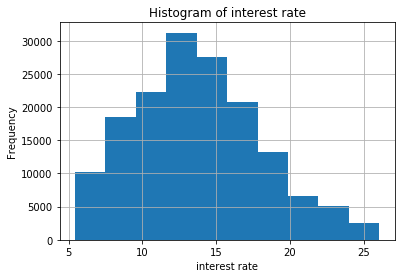

In [115]:
clean_data_after_outlier.int_rate.hist()
plt.title('Histogram of interest rate')
plt.xlabel('interest rate')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount',bbox_inches='tight')

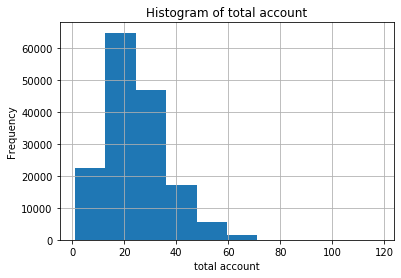

In [116]:
clean_data_after_outlier.total_acc.hist()
plt.title('Histogram of total account')
plt.xlabel('total account')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount')

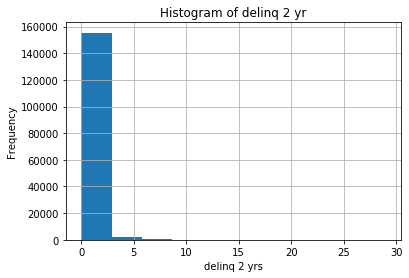

In [117]:
clean_data_after_outlier.delinq_2yrs.hist()
plt.title('Histogram of delinq 2 yr')
plt.xlabel('delinq 2 yrs')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount')

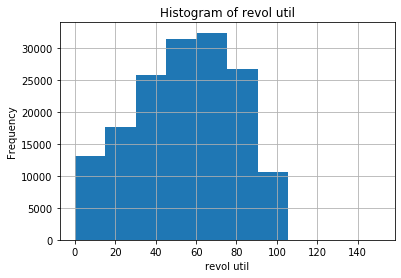

In [118]:
clean_data_after_outlier.revol_util.hist()
plt.title('Histogram of revol util')
plt.xlabel('revol util')
plt.ylabel('Frequency')
plt.savefig('hist_loan_amount')

# step 6:data interpretation

In [119]:
clean_data_after_outlier.groupby('purpose')[['int_rate']].mean()

,int_rate
purpose,
car,11.434548
credit_card,12.994626
debt_consolidation,14.041412
educational,12.125872
home_improvement,12.907267
house,14.210234
major_purchase,11.935771
medical,14.266015
moving,14.589785


In [120]:
clean_data_after_outlier.groupby('home_ownership')[['int_rate']].mean()

,int_rate
home_ownership,
ANY,11.670000
MORTGAGE,13.453442
NONE,14.603600
OTHER,13.036340
OWN,13.905118
RENT,13.980639


In [121]:
clean_data_after_outlier.groupby('home_ownership')[['annual_inc']].mean()

,annual_inc
home_ownership,
ANY,35680.000000
MORTGAGE,83547.960070
NONE,70455.040000
OTHER,66638.313725
OWN,66381.212059
RENT,61841.043446


In [122]:
clean_data_after_outlier.groupby('verification_status')[['annual_inc']].mean()

,annual_inc
verification_status,
not verified,63073.830123
verified,78470.103680


In [ ]:
clean_data_after_outlier.groupby('verification_status')[['int_rate']].mean()

In [ ]:
clean_data_after_outlier.groupby('verification_status')[['loan_amnt']].plot.hist()

In [125]:
clean_data_after_outlier.groupby('verification_status')[['bad_loan']].mean()

,bad_loan
verification_status,
not verified,0.150225
verified,0.197576


# step 7:convert categorical features into numerical

# analyze categorical data

In [126]:
data=clean_data_after_outlier[['home_ownership','purpose','term','addr_state']]
data

,home_ownership,purpose,term,addr_state
0,RENT,credit_card,36 months,AZ
1,RENT,car,60 months,GA
2,RENT,small_business,36 months,IL
3,RENT,other,36 months,CA
4,RENT,wedding,36 months,AZ
...,...,...,...,...
163982,MORTGAGE,credit_card,60 months,OK
163983,OWN,home_improvement,36 months,VA
163984,MORTGAGE,debt_consolidation,36 months,TX
163985,RENT,credit_card,60 months,NY


In [127]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

home_ownership : 6 labels
purpose : 14 labels
term : 2 labels
addr_state : 50 labels


In [128]:
pd.get_dummies(data,drop_first=True).shape

(157996, 68)

In [129]:
data.addr_state.value_counts().sort_values(ascending=False)

CA    27725
NY    13752
TX    11793
FL    10893
NJ     6271
IL     5914
PA     5230
VA     5139
GA     5003
OH     4707
NC     4214
MA     4060
MD     3780
AZ     3726
WA     3668
MI     3556
CO     3410
MN     2677
MO     2525
CT     2483
NV     2275
OR     2044
WI     1919
AL     1869
LA     1809
SC     1756
KY     1411
IN     1397
UT     1352
KS     1285
OK     1272
TN     1259
AR     1051
HI      919
NM      794
NH      733
RI      677
WV      677
DC      569
MT      464
DE      424
AK      400
WY      359
SD      306
VT      258
MS      154
NE       13
IA       12
ID        9
ME        3
Name: addr_state, dtype: int64

In [130]:
data.purpose.value_counts().sort_values(ascending=False)

debt_consolidation    90268
credit_card           29569
other                  9949
home_improvement       9428
major_purchase         4481
small_business         3741
car                    2724
medical                1912
wedding                1729
moving                 1394
house                  1196
vacation               1013
educational             407
renewable_energy        185
Name: purpose, dtype: int64

In [131]:
data.home_ownership.value_counts().sort_values(ascending=False)

MORTGAGE    76947
RENT        68317
OWN         12553
OTHER         153
NONE           25
ANY             1
Name: home_ownership, dtype: int64

# step 7.1 select top most categories

In [132]:
top_20_addr_states=[x for x in data.addr_state.value_counts().sort_values(ascending=False).head(23).index]

In [133]:
top_20_addr_states

['CA',
 'NY',
 'TX',
 'FL',
 'NJ',
 'IL',
 'PA',
 'VA',
 'GA',
 'OH',
 'NC',
 'MA',
 'MD',
 'AZ',
 'WA',
 'MI',
 'CO',
 'MN',
 'MO',
 'CT',
 'NV',
 'OR',
 'WI']

In [134]:
top_3_home_ownerships=[x for x in data.home_ownership.value_counts().sort_values(ascending=False).head(3).index]

In [135]:
top_3_home_ownerships

['MORTGAGE', 'RENT', 'OWN']

In [136]:
top_most_purpose=[x for x in data.purpose.value_counts().sort_values(ascending=False).head(8).index]
top_most_purpose

['debt_consolidation',
 'credit_card',
 'other',
 'home_improvement',
 'major_purchase',
 'small_business',
 'car',
 'medical']

# step 7.2:label encoding

In [137]:
top_most_term=[x for x in data.term.value_counts().sort_values(ascending=False).head(2).index]
top_most_term

['36 months', '60 months']

In [138]:
for label in top_20_addr_states:
      data[label]=np.where(data['addr_state']==label,1,0)
addr_state=data[['addr_state']+top_20_addr_states]
    

C:\Users\hadiqa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
for label in top_3_home_ownerships:
       data[label]=np.where(data['home_ownership']==label,1,0)
home_ownership=data[['home_ownership']+top_3_home_ownerships]

In [140]:
for label in top_most_purpose:
       data[label]=np.where(data['purpose']==label,1,0)
purpose=data[['purpose']+top_most_purpose]

In [141]:
for label in top_most_term:
       data[label]=np.where(data['term']==label,1,0)
term=data[['term']+top_most_term]

# step 7.3:concateante all the label columns

In [142]:
final=pd.concat([addr_state,home_ownership,purpose,term],axis=1)

In [143]:
final

,addr_state,CA,NY,TX,FL,NJ,IL,PA,VA,GA,...,credit_card,other,home_improvement,major_purchase,small_business,car,medical,term,36 months,60 months
0,AZ,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,36 months,1,0
1,GA,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,60 months,0,1
2,IL,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,36 months,1,0
3,CA,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,36 months,1,0
4,AZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36 months,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,OK,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,60 months,0,1
163983,VA,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,36 months,1,0
163984,TX,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36 months,1,0
163985,NY,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,60 months,0,1


# step:7.4 drop all the original category column

In [144]:
new=final.drop(['purpose','home_ownership','term','addr_state'],axis='columns')
new

,CA,NY,TX,FL,NJ,IL,PA,VA,GA,OH,...,debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,medical,36 months,60 months
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
163983,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
163984,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
163985,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# step 7.4: make final dataframe contain all the features

In [145]:
final_data=pd.concat([new,data_colinear],axis=1)

In [146]:
final_data

,CA,NY,TX,FL,NJ,IL,PA,VA,GA,OH,...,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
0,0,0,0,0,0,0,0,0,0,0,...,5000,10.65,10.0,24000.0,27.65,0.0,83.7,9.0,0,26.0
1,0,0,0,0,0,0,0,0,1,0,...,2500,15.27,0.0,30000.0,1.00,0.0,9.4,4.0,1,12.0
2,0,0,0,0,0,1,0,0,0,0,...,2400,15.96,10.0,12252.0,8.72,0.0,98.5,10.0,0,10.0
3,1,0,0,0,0,0,0,0,0,0,...,10000,13.49,10.0,49200.0,20.00,0.0,21.0,37.0,0,15.0
4,0,0,0,0,0,0,0,0,0,0,...,5000,7.90,3.0,36000.0,11.20,0.0,28.3,12.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,0,0,0,0,0,0,0,0,0,0,...,15000,12.39,3.0,45000.0,31.44,4.0,75.8,34.0,0,20.0
163983,0,0,0,0,0,0,0,1,0,0,...,20000,14.99,10.0,80000.0,23.65,0.0,68.8,18.0,0,22.0
163984,0,0,1,0,0,0,0,0,0,0,...,12825,17.14,6.0,38000.0,9.03,0.0,70.7,24.0,0,9.0
163985,0,1,0,0,0,0,0,0,0,0,...,27650,21.99,0.0,60000.0,10.10,1.0,61.2,20.0,0,6.0


In [147]:
final_data.isna().any()

CA                       False
NY                       False
TX                       False
FL                       False
NJ                       False
IL                       False
PA                       False
VA                       False
GA                       False
OH                       False
NC                       False
MA                       False
MD                       False
AZ                       False
WA                       False
MI                       False
CO                       False
MN                       False
MO                       False
CT                       False
NV                       False
OR                       False
WI                       False
MORTGAGE                 False
RENT                     False
OWN                      False
debt_consolidation       False
credit_card              False
other                    False
home_improvement         False
major_purchase           False
small_business           False
car     

# step 8:feature selection and logistic regession

In [148]:
new_features=final_data.drop(['emp_length','delinq_2yrs'],axis=1)
new_features

,CA,NY,TX,FL,NJ,IL,PA,VA,GA,OH,...,36 months,60 months,loan_amnt,int_rate,annual_inc,dti,revol_util,total_acc,bad_loan,longest_credit_length
0,0,0,0,0,0,0,0,0,0,0,...,1,0,5000,10.65,24000.0,27.65,83.7,9.0,0,26.0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2500,15.27,30000.0,1.00,9.4,4.0,1,12.0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2400,15.96,12252.0,8.72,98.5,10.0,0,10.0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,10000,13.49,49200.0,20.00,21.0,37.0,0,15.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,5000,7.90,36000.0,11.20,28.3,12.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,0,0,0,0,0,0,0,0,0,0,...,0,1,15000,12.39,45000.0,31.44,75.8,34.0,0,20.0
163983,0,0,0,0,0,0,0,1,0,0,...,1,0,20000,14.99,80000.0,23.65,68.8,18.0,0,22.0
163984,0,0,1,0,0,0,0,0,0,0,...,1,0,12825,17.14,38000.0,9.03,70.7,24.0,0,9.0
163985,0,1,0,0,0,0,0,0,0,0,...,0,1,27650,21.99,60000.0,10.10,61.2,20.0,0,6.0


# applied logistic regression without outlier removal from the data to check if there an increase in accuracy and i found out that the accuracy of logistic regression increased

In [171]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# load data
X=new_features.values
Y=clean_data_after_outlier[['verification_status']]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=1)

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,40)
fit = rfe.fit(X_train,  np.ravel(y_train,order='C'))
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Num Features: 40
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True False  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4
 1 5 1 2 1 1 1]


C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [172]:
y_pred = fit.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(fit.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.65


# work done after project submission to improve accuracy of the model

# features selection technique: chi square 

In [173]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv("loan.csv")
X =new_features.iloc[:,0:45] 
y = clean_data_after_outlier.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
print(featureScores.nlargest(20,'Score')) 

C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.64
                 features         Score
38             annual_inc  1.199027e+08
36              loan_amnt  1.009754e+08
41              total_acc  1.264638e+04
37               int_rate  1.125411e+04
35              60 months  1.121737e+04
40             revol_util  7.692547e+03
39                    dti  6.151570e+03
43  longest_credit_length  5.139261e+03
34              36 months  2.985569e+03
24                   RENT  5.450219e+02
23               MORTGAGE  5.364943e+02
42               bad_loan  4.583672e+02
31         small_business  2.957815e+02
28                  other  2.696463e+02
26     debt_consolidation  2.394485e+02
32                    car  2.349291e+02
30         major_purchase  1.568812e+02
27            credit_card  7.023191e+01
33                medical  5.984393e+01
0                      CA  3.358754e+01


# visualize features which are important in predicting the outcome

C:\Users\hadiqa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00757672 0.00895731 0.00828881 0.00824743 0.00647215 0.00606534
 0.00539462 0.00567276 0.00514563 0.00504176 0.00491356 0.00473146
 0.00415426 0.00489675 0.00439975 0.00476566 0.00424262 0.00398553
 0.00384943 0.00386877 0.0035737  0.00299341 0.00266267 0.00489176
 0.0061321  0.00401624 0.00775474 0.00525708 0.0044439  0.00442818
 0.00327245 0.00295258 0.00236942 0.00220634 0.031388   0.04008986
 0.15955237 0.10743392 0.09638829 0.10675892 0.09686389 0.09210104
 0.01302781 0.08877102]


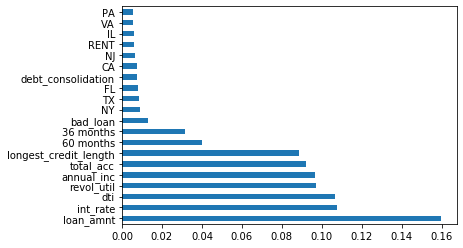

In [170]:
import pandas as pd
import numpy as np
data = pd.read_csv("loan.csv")
X = new_features.iloc[:,0:45]  #independent columns
y = clean_data_after_outlier.iloc[:,-1]   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
